# Advertising Sales Channel Prediction
### Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Advertising.csv


In [1]:
# Importing basic laibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importing data
df = pd.read_csv(r"C:\Users\Abhimanyu\Downloads\Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


* **We have one column 'Unnamed:0' which only has index need to drop.**

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.sample(7) # Checking random samples

,TV,radio,newspaper,sales
36,266.9,43.8,5.0,25.4
61,261.3,42.7,54.7,24.2
129,59.6,12.0,43.1,9.7
184,253.8,21.3,30.0,17.6
153,171.3,39.7,37.7,19.0
110,225.8,8.2,56.5,13.4
199,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


* **All values are float**

In [7]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

* **Here we can Clearly see, Data distrubution has no missing values as well as Null values.**

## Plotting

In [10]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

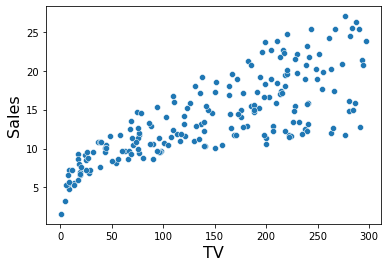

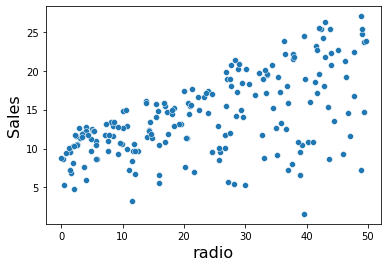

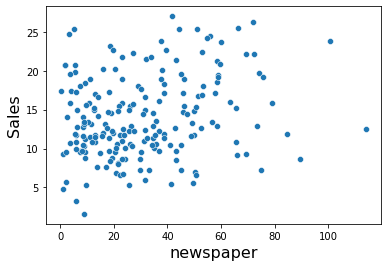

In [11]:
for i in ['TV', 'radio', 'newspaper']:
    sns.scatterplot(x=i,y='sales',data=df)
    plt.xlabel(i,fontsize = 16)
    plt.ylabel('Sales',fontsize = 16)
    plt.show()
          

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

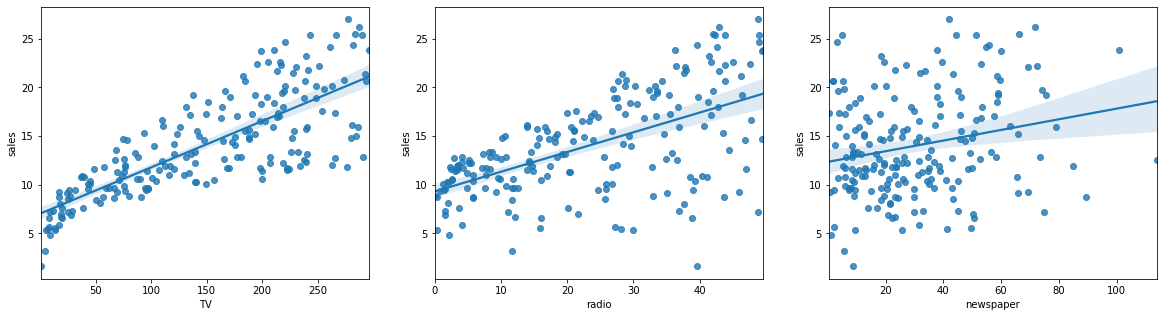

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.regplot(df['TV'], df['sales'], ax=ax[0])
sns.regplot(df['radio'], df['sales'], ax=ax[1])
sns.regplot(df['newspaper'], df['sales'], ax=ax[2])

* **Our both columns Tv and Radio show positive realation with the target , newspaper whereas somehow scatterd**

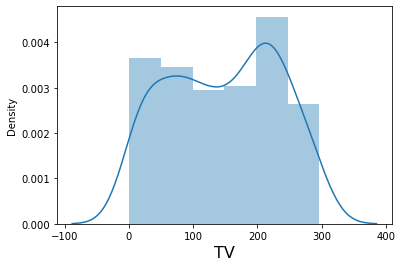

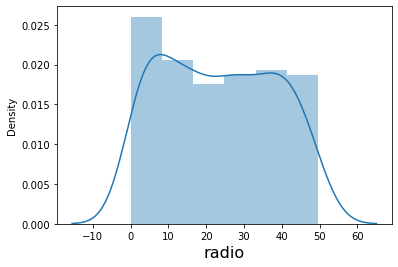

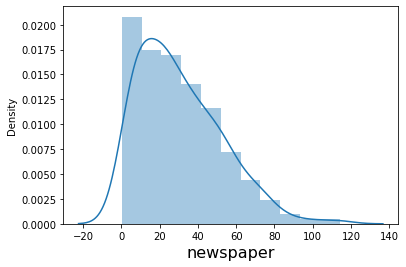

In [13]:
# finding out data distribution:

for i in ['TV', 'radio', 'newspaper']:
    sns.distplot(df[i])
    plt.xlabel(i,fontsize = 16)
    plt.show()

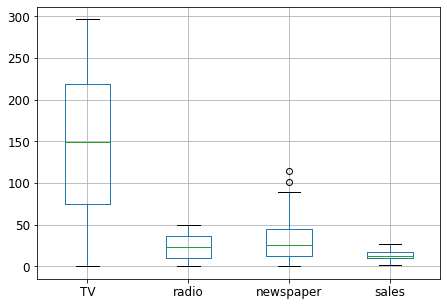

In [14]:
# Checking for outliers

df.boxplot(figsize=(8,5), fontsize = 12)
plt.subplots_adjust(0.2)

* **As We dont have too many outliers in our dataset and also we have small amout of data, no need to remove the outliers.**

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


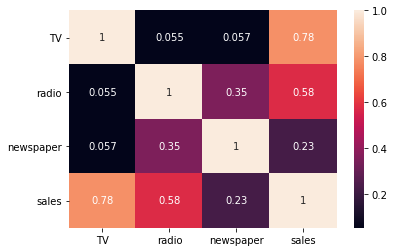

In [15]:
# Checking for correlation

corr_mat = df.corr()
print(corr_mat)

sns.heatmap(corr_mat, annot = True)
plt.show()

* **We can see that TV is highly correlated to the target variable and next is the radio and newspaper is least correlated**

In [16]:
# Dividing Dataset into features and Labels

x = df.drop('sales', axis=1)
y =df['sales']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [18]:
x = x_scaled

## Model Building

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# splitting data into training as=nd testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=47)

* **Model instantiating and training (Linear Regression)**

In [21]:
RE = LinearRegression()
RE.fit(x_train,y_train)

# Checking R2 score
RE.score(x_train,y_train)

0.8986105026216175

In [22]:
# Checking R2 score for testing data
RE.score(x_test,y_test)

0.8861176124930538

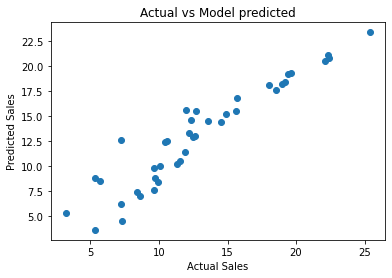

In [23]:
# Visulising the actual vs Predicted
y_predict = RE.predict(x_test)
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Model predicted')

plt.show()

In [24]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = RE.predict(x_test)
ma_error = mean_absolute_error(y_test,y_pred)
ms_error =mean_squared_error(y_test,y_pred)

print('Mean absolute error>>',ma_error)
print('mean_absolute_error>>',ms_error)

Mean absolute error>> 1.3836057179961645
mean_absolute_error>> 3.2099110389833667


* **Checking for model overfitting by Lasso and Ridge**

In [25]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV , LassoCV

lasscv = LassoCV(alphas = None, max_iter = 1550, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=1550, normalize=True)

In [26]:
alpha = lasscv.alpha_
alpha

0.007864116008342616

In [27]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.007864116008342616)

In [28]:
lasso_reg.score(x_test,y_test)

0.8860333260373041

In [29]:
ridgecv = RidgeCV(alphas = np.arange(0.0001,0.2,0.2), normalize = True)
ridgecv.fit(x_train,y_train)

ridgecv.alpha_

0.0001

In [30]:
ridge_model = Ridge(alpha =ridgecv.alpha_)                   
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.8861175939688397

* **Here we are getting same score R2 score hence model is not overfitting**

In [31]:
# Saving the model
import joblib


joblib.dump(RE,"Advertising_sales_model.pkl")

['Advertising_sales_model.pkl']